In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


<Axes: xlabel='generation_id', ylabel='count'>

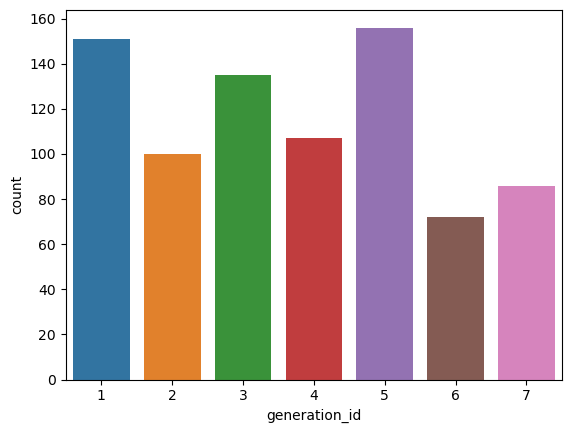

In [19]:
sb.countplot(data=pokemon, x='generation_id')

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


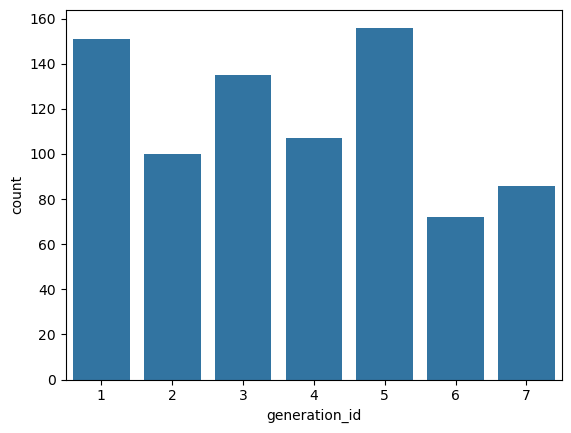

In [13]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples.
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color.
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

print(base_color)

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

## Similar Chart using MatPlotPlib

[1 2 3 4 5 6 7]
generation_id
1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: count, dtype: int64


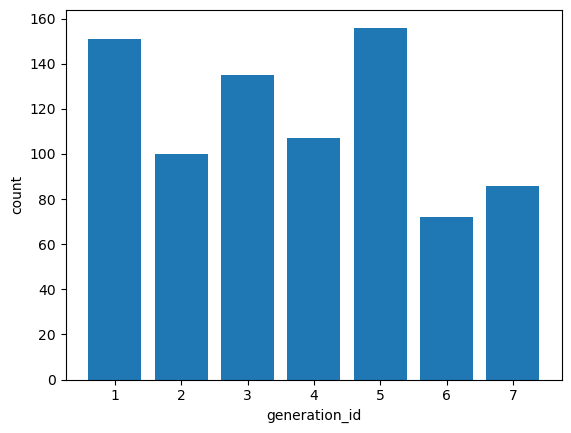

In [23]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()
print(x)

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)
print(y)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

# Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

<Axes: xlabel='generation_id', ylabel='count'>

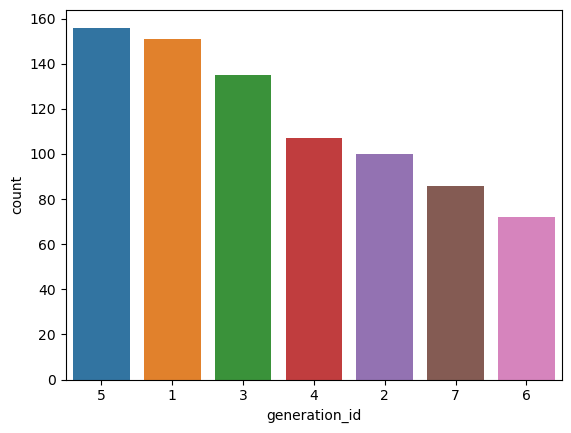

In [24]:
# Stactic order
sb.countplot(data=pokemon, x='generation_id', order=[5,1,3,4,2,7,6])

<Axes: xlabel='generation_id', ylabel='count'>

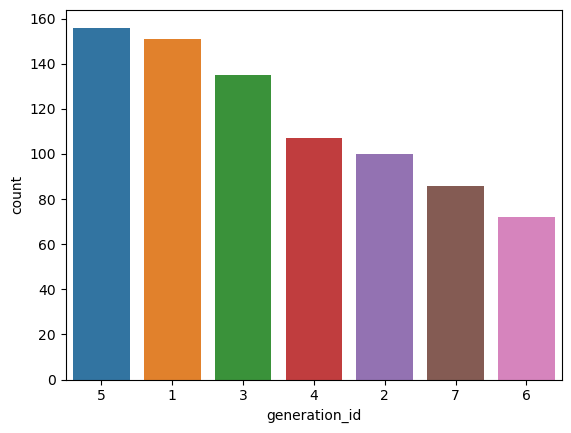

In [35]:
#Dynamic oder

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
## Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts(sort=True)


# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', order=freq.index)

# Rotating the cateogry labels

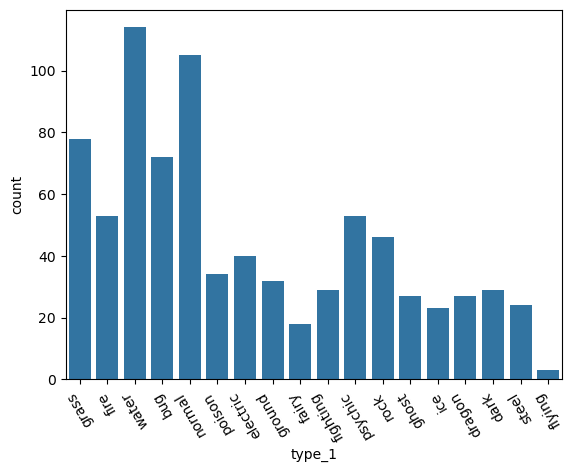

In [38]:
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=120)

# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);




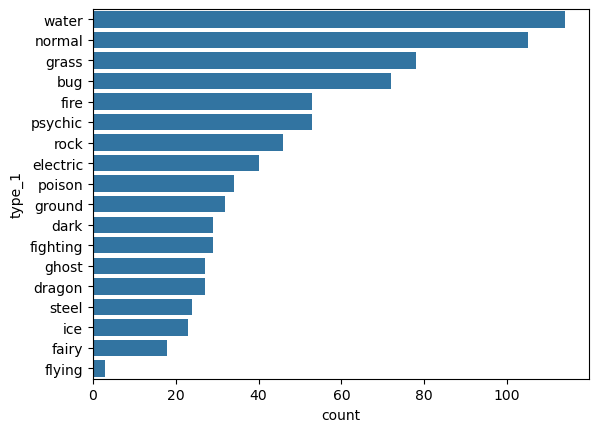

In [39]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

# Absolute vs Relative Frequency

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)


(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


The function below will do the following in the pokemon dataframe *out of place*:

1. Select the 'id', and 'species' columns from pokemon.
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1` and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [5]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head(10)
pkmn_types.tail(10)

# pkmn_types.shape

,id,species,type_level,type
1604,798,kartana,type_2,steel
1605,799,guzzlord,type_2,dragon
1606,800,necrozma,type_2,NaN
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1609,803,poipole,type_2,NaN
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost
1613,807,zeraora,type_2,NaN


In [9]:
type_counts = pkmn_types['type'].value_counts()
type_counts

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [10]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

<Axes: xlabel='count', ylabel='type'>

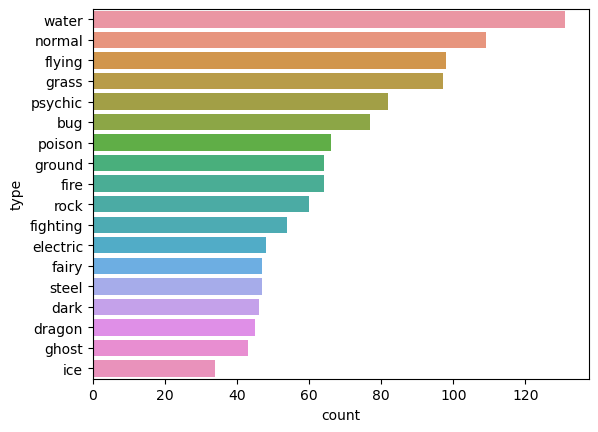

In [11]:
sb.countplot(data=pkmn_types, y='type', order=type_order)

# Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.


In [12]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
n_pokemon

1212

In [13]:
# Return the highest frequency in the `type` column
max_type_count = type_counts.iloc[0]

In [14]:
max_type_count

131

In [15]:
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop) # 0.108085808581

0.10808580858085809


In [20]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [22]:
tick_names = ['{:0.2f}'.format(v)for v in tick_props]
tick_names


['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

In [23]:
pkmn_types

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1609,803,poipole,type_2,NaN
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost


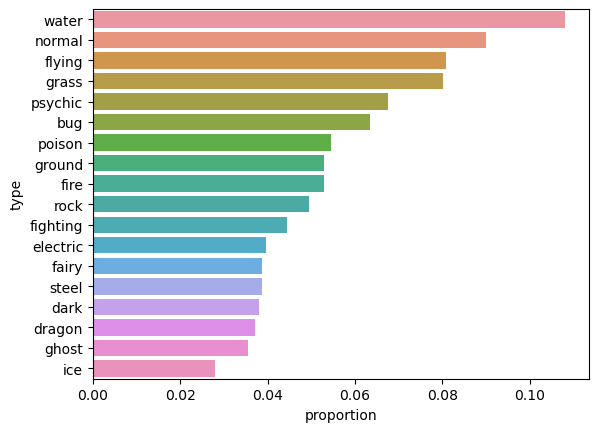

In [24]:
sb.countplot(data=pkmn_types, y='type', order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

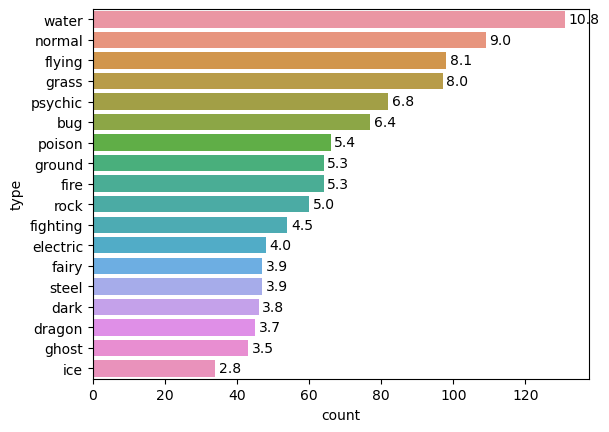

In [27]:

# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
sb.countplot(data=pkmn_types, y='type', order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts.iloc[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')


# Example 4. Print the text (proportion) below the bars of a Vertical plot.

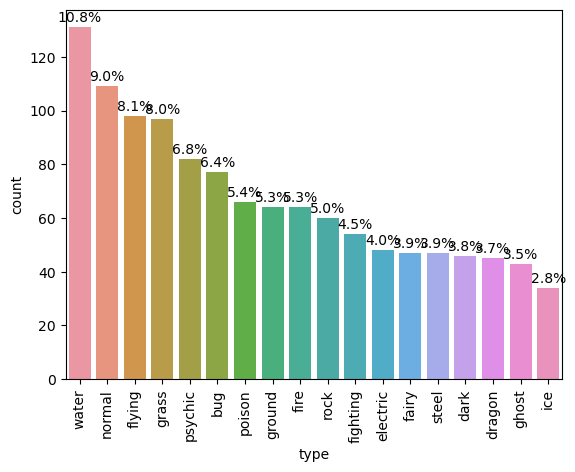

In [28]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
sb.countplot(data=pkmn_types, x='type', order=type_order);

# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')